# Assignment 3: Classification with Logistic Regression

# Total: /100

## Instructions

* Complete the assignment

* Once the notebook is complete, restart your kernel and rerun your cells

* Submit this notebook to owl by the deadline

* You may use any python library functions you wish to complete the assignment.

## The Dataset

The goal of our classifier is to predict, using a logistic regression, if a patient may take a certain drug.

The dataset contains both numerical and categorical input variables, while the response variable ('Drug') has multiple levels. To simplify our analysis here, we focus on predicting if a patient may take "Drug-Y".

In [308]:
# You may need these
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
seed=0
%matplotlib inline

## Question 1: /18 pts

1. Read in the `drug.csv` dataset and display the first 5 rows.
2. Print out all columns in the dataset and list categorical variables. Use the build-in function `get_dummies()` to convert all categorical variables (**exclude Drug variable**) to dummy variables. You may read the official explanations for more information on `get_dummies()` [here](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html). What's the size of the dataframe after transforming it?
3. Map the target values from yes/no to 1/0. What is the baseline accuracy for this classification problem? Round into 1 decimal place (for example, 50.1% or 0.501).

1.1 Read the dataset and display the first 8 rows, and print out all columns in the dataset and **list** all categorical variables in the answer part.

In [252]:
# Question 1.1 code here
df = pd.read_csv("drug.csv")

cols = df.columns.tolist()
print("All Columns:", cols)

df.head(8)
#5 pts

All Columns: ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug']


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,DrugY
2,47,M,LOW,HIGH,10.114,DrugY
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,NaN,LOW,HIGH,11.037,drugC


**YOUR ANSWER HERE:** [1pt] 
Age, Sex, BP, Cholesterol, Na_to_K, Drug

1.2 Check that is any there missing value in each column of the dataset.  

In [253]:
# Question 1.2 code here
df.isna().sum()
#2 pts

Age            0
Sex            3
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

1.3 Replace all the missing values in **Sex** to be 'M'.

In [254]:
# Question 1.3 code here
d = df.fillna("M")
d.isna().sum()
d

#2 pts

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,DrugY
2,47,M,LOW,HIGH,10.114,DrugY
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,DrugY
196,16,M,LOW,HIGH,12.006,DrugY
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


1.4 Use the build-in function `get_dummies()` to convert all categorical variables (**excluding `Drug` variable**) to dummy variables. What's the size of the dataframe after transforming?

In [255]:
# Question 1.4 code here
# dat = d.drop(columns=["Drug"])
# dat.head()
tempdata = d.drop('Drug', axis='columns') #independent is everything else
data = pd.get_dummies(tempdata) #includes all columns besides drug
data.insert(1, "Drug", d.Drug.values) #reinsert Drug
data

#2 pts

,Age,Drug,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,DrugY,25.355,1,0,1,0,0,1,0
1,47,DrugY,13.093,0,1,0,1,0,1,0
2,47,DrugY,10.114,0,1,0,1,0,1,0
3,28,drugX,7.798,1,0,0,0,1,1,0
4,61,DrugY,18.043,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
195,56,DrugY,11.567,1,0,0,1,0,1,0
196,16,DrugY,12.006,0,1,0,1,0,1,0
197,52,drugX,9.894,0,1,0,0,1,1,0
198,23,drugX,14.020,0,1,0,0,1,0,1


**YOUR ANSWER HERE:** [1pt] 

The size of the datagrame is still 200 rows, but now there are more columns increasing it to 200 rows by 10 columns.

1.5 Transform all the labels that are 'DrugY' in **`Drug`** to be value 1, otherwise, to be 0. Then transform the type of **`Drug`** to be 'int'.


In [256]:
# Question 1.5 code here
data['Drug'] = data['Drug'].replace(['DrugY','drugX','drugC','drugA','drugB'],[1,0,0,0,0])#this changes all of DrugY to value 1, drugX to 0
data = data.astype({'Drug':'int'}) #convert drug to int
print(data.Drug.dtype)
data
#2 pts

int64


,Age,Drug,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,1,25.355,1,0,1,0,0,1,0
1,47,1,13.093,0,1,0,1,0,1,0
2,47,1,10.114,0,1,0,1,0,1,0
3,28,0,7.798,1,0,0,0,1,1,0
4,61,1,18.043,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
195,56,1,11.567,1,0,0,1,0,1,0
196,16,1,12.006,0,1,0,1,0,1,0
197,52,0,9.894,0,1,0,0,1,1,0
198,23,0,14.020,0,1,0,0,1,0,1


1.6. What is the baseline accuracy for this classification problem? Round into 1 decimal place (for example, 0.2).

In [257]:
# Your code here
print(data.Drug.value_counts())
Y = data.Drug[data['Drug']==1].count() # majority class
N = data.Drug[data['Drug']==0].count()

baselineacc = Y/(Y+N)

print('Baseline Accuracy: '+str((baselineacc*100).round(1))+'%')
#2 pts

1    102
0     98
Name: Drug, dtype: int64
Baseline Accuracy: 51.0%


**YOUR ANSWER HERE:** [1pt] 
baseline: 51%

## Question 2: /7 pts

Split the data into train and test for the outcome/response and the predictor variables. Hold out 25% of observations as the test set.  Pass `random_state=11` to `train_test_split` to ensure you get the same train and tests sets as the solution. Your dependent variable in the the dataset is named as `Drug`. How many patients who take "DrugY" in the train dataset and test dataset, respectively?

In [258]:
# Question 2 code here.
X = data.drop('Drug', axis='columns').values #independent is everything else
y = data.Drug.values #dependent, so it is 1

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=11) #0.25 for test set

# Don't use the "Drug" as a feature
print("{} patients take DrugY in the train dataset".format(sum(Xtrain[Xtrain==1])))
print("{} patients take DrugY in the test dataset".format(sum(Xtest[Xtest==1])))

#6 pts correct code

450.0 patients take DrugY in the train dataset
150.0 patients take DrugY in the test dataset


**YOUR ANSWER HERE:** [1pt] 

450.0 patients take DrugY in the train dataset


150.0 patients take DrugY in the test dataset

## Question 3: /20 pts

3.1 Create a instance of sklearn's `LogisticRegression` object for **unpenalized** logistic regression.
Using this object, **run a logisitic regression analysis** of `Drug` (y-variable) against `Age` and `Na_to_K` (x-variables) using your training data. Report the parameters (variables and intercept) of your model as indicated with the `print` function.

In [262]:
# Question 3 code here
Age = Xtrain[:,0]
Na = Xtrain[:,1]
X = [Age,Na]

druglr = LogisticRegression(penalty='none').fit(Xtrain,ytrain)
print(f"Intercept:\n {druglr.intercept_.round(3)} \nCoefficients:\n {druglr.coef_.round(3)}")
#10 pts 

Intercept:
 [-5.019] 
Coefficients:
 [[-0.035  0.929 -2.845 -2.174 -2.728  0.142 -2.433 -1.53  -3.489]]


/Users/oren/opt/anaconda3/envs/DS3000/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


3.2 Compute 4 label-based criteria, namely, 'Accuracy', 'Precision', 'Sensitivity' and 'Specificity' for your two variables only classifier **using the test data** (Round into 4 decimal place). Use a threshold of 0.5. Answer the questions in this text box below.

In [268]:
## Put code here to compute criteria:
# Calculate performance measures from scratch
# TP: true positives 
# TN: true negatives 
# FP: False positives 
# FN: False negatives

def compute_performance(yhat, y, classes):
    # First, get tp, tn, fp, fn
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))

    print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
    
    # Accuracy
    acc = (tp + tn) / (tp + tn + fp + fn)
    
    # Precision
    # "Of the ones I labeled +, how many are actually +?"
    precision = tp / (tp + fp)

    # Recall
    # "Of all the + in the data, how many do I correctly label?"
    recall = tp / (tp + fn)    
    
    # Sensitivity
    # "Of all the + in the data, how many do I correctly label?"
    sensitivity = recall
    
    # Specificity
    # "Of all the - in the data, how many do I correctly label?"
    specificity = tn / (fp + tn)
    
    # Print results
    print("Accuracy:",round(acc,3),"Precision:",round(precision,3),
          "Sensitivity:",round(sensitivity,3),"Specificity:",round(specificity,3))



#5 pts

In [272]:
## Put the code you need to answer the following questions.

threshold = 0.1
ytest_prob = druglr.predict_proba(Xtest)
ytest_hat = druglr.classes_[(ytest_prob[:,1] > threshold).astype(int)]

# ytest_hat
compute_performance(ytest_hat, ytest, druglr.classes_)

# Let's compare against base-line accuracy:
print('\nBaseline Accuracy: ', baselineacc.round(3))


confusion_matrix(ytest_hat,ytest).T
#2 pts

tp: 26 tn: 17 fp: 7 fn: 0
Accuracy: 0.86 Precision: 0.788 Sensitivity: 1.0 Specificity: 0.708

Baseline Accuracy:  0.51


array([[17,  7],
       [ 0, 26]])

* How many of the test instances are labeled positive by your classifier? 

26 true, 7 false

**YOUR ANSWER HERE:**[1 pt] 

* Does this classifier reach the baseline accuracy?

This clasifier exceeds the baseline accuracy significantly, indicating a way better classifier

**YOUR ANSWER HERE:** [1 pt] 

* Is this classifier useful for classifying drug-Y? Explain in one or two sentences using the performance matrix results.

Looking at the performance matrix, it was clearly useful as it only labeled 7 false positives, and 0 false negatives, compared to the 26 true positives and 17 true negatives it got, which is a useful classifier for drug-Y

**YOUR ANSWER HERE:**[1 pt] 

## Question 4: /8 pts
Now with default penalty method, fit two logistic regression models using tuning parameter $C=0.1$ and $C=1$ to the training data and include all the variables in the data frame (except for `Drug`) in the cell below. You will want to make new objects like you did for the simpler model. Print the parameters (variables and intercept) you obtain, respectively.

In [291]:
# Code for Question 4
c01lr = LogisticRegression(C = 0.1).fit(Xtrain,ytrain)
c1lr = LogisticRegression(C = 1).fit(Xtrain,ytrain)

# druglr = LogisticRegression(penalty='none').fit(Xtrain,ytrain)
print("Parameters for regression with a tuning paramter of C = 0.1: ")
print(f"Intercept:\n {c01lr.intercept_.round(3)} \nCoefficients:\n {c01lr.coef_.round(3)}")
print("\nParameters for regression with a tuning paramter of C = 1: ")
print(f"Intercept:\n {c1lr.intercept_.round(3)} \nCoefficients:\n {c1lr.coef_.round(3)}")

# #7 pts

Parameters for regression with a tuning paramter of C = 0.1: 
Intercept:
 [-7.956] 
Coefficients:
 [[-0.013  0.603 -0.113  0.113 -0.242  0.366 -0.124  0.238 -0.238]]

Parameters for regression with a tuning paramter of C = 1: 
Intercept:
 [-9.926] 
Coefficients:
 [[-0.025  0.776 -0.261  0.261 -0.721  1.185 -0.464  0.665 -0.665]]


* Describe the differences between the fitted model parameters obtained from the two models here.

the fit with a larger tuning parameter yields a more negative intercept, since it has a smaller regularization than c=0.1 with a larger regularization.

**YOUR ANSWER:** [1 pt] 

## Question 5: /15 pts

In the cell below, compute the 4 label-based criteria we mentioned in Question 3.2 for the two new classifiers using the test data. (You don't have to copy the function down into this cell; just call it again here.) Use a threshold of 0.5. 

In [303]:
# Code for  Code for answering questions in the below cell
threshold = 0.5
ytest_prob01 = c01lr.predict_proba(Xtest)
ytest_hat01 = c01lr.classes_[(ytest_prob01[:,1] > threshold).astype(int)]

ytest_prob1 = c1lr.predict_proba(Xtest)
ytest_hat1 = c1lr.classes_[(ytest_prob1[:,1] > threshold).astype(int)]

# ytest_hat
compute_performance(ytest_hat01, ytest, c01lr.classes_)
compute_performance(ytest_hat1, ytest, c1lr.classes_)

# Let's compare against base-line accuracy:
print('\nBaseline Accuracy: ', baselineacc.round(3))


print("performance matrix for C=0.1 lr: \n", confusion_matrix(ytest_hat01,ytest).T)
print("performance matrix for C=1 lr: \n",confusion_matrix(ytest_hat1,ytest).T)

#9 pts

tp: 25 tn: 24 fp: 0 fn: 1
Accuracy: 0.98 Precision: 1.0 Sensitivity: 0.962 Specificity: 1.0
tp: 24 tn: 24 fp: 0 fn: 2
Accuracy: 0.96 Precision: 1.0 Sensitivity: 0.923 Specificity: 1.0

Baseline Accuracy:  0.51
performance matrix for C=0.1 lr: 
 [[24  0]
 [ 1 25]]
performance matrix for C=1 lr: 
 [[24  0]
 [ 2 24]]


* How many of the test instances are respectively labeled positive by the two classifiers?

the first one has 25 true positives, the second has 24

**YOUR ANSWER:** [3 pts] 

* Among the classifiers in Questions 3 and 4, which one is the **best classifier** for classifying Drug? Explain the possible reason in one or two sentences.

I believe that the classifier that is the best is the logistic regression with tuning parameter c=0.1 since it results in most of the data being classified most accurately.

**YOUR ANSWER:** [3 pts] 

## Question 6: /14 pts
In the cell below, predict the class coding your own sigmoid function (do NOT use  the predict function from sklear). Compare the first 5 rows using the three models constructed in question 4 and question 5.

In [306]:
# Your code here
sigmoid = lambda x: 1 / (1 + np.exp(-x)) 
z1 = druglr.intercept_ + Xtest@druglr.coef_.T
z1 = sigmoid(z1).round(2)
z2 = c01lr.intercept_ + Xtest@c01lr.coef_.T
z2 = sigmoid(z2).round(2)
z3 = c1lr.intercept_ + Xtest@c1lr.coef_.T
z3 = sigmoid(z3).round(2)

print("Probabilities for class 1: ", z1)
print("Probabilities for class 2: ", z2)
print("Probabilities for class 3: ", z3)

#8 pts

Probabilities for class 1:  [[0.05]
 [1.  ]
 [0.99]
 [0.01]
 [1.  ]
 [0.9 ]
 [1.  ]
 [0.01]
 [0.16]
 [0.97]
 [0.95]
 [1.  ]
 [0.99]
 [0.05]
 [0.15]
 [0.01]
 [0.09]
 [1.  ]
 [0.  ]
 [1.  ]
 [0.31]
 [0.22]
 [0.28]
 [1.  ]
 [0.  ]
 [0.07]
 [0.94]
 [0.81]
 [0.29]
 [0.  ]
 [0.12]
 [1.  ]
 [0.92]
 [1.  ]
 [1.  ]
 [0.  ]
 [0.01]
 [0.03]
 [0.01]
 [1.  ]
 [1.  ]
 [0.2 ]
 [0.  ]
 [0.01]
 [1.  ]
 [0.93]
 [0.  ]
 [1.  ]
 [0.15]
 [1.  ]]
Probabilities for class 2:  [[0.24]
 [1.  ]
 [0.94]
 [0.06]
 [1.  ]
 [0.91]
 [0.98]
 [0.09]
 [0.5 ]
 [0.75]
 [0.67]
 [0.99]
 [0.97]
 [0.33]
 [0.28]
 [0.04]
 [0.15]
 [1.  ]
 [0.01]
 [1.  ]
 [0.15]
 [0.34]
 [0.39]
 [0.99]
 [0.05]
 [0.27]
 [0.93]
 [0.76]
 [0.49]
 [0.03]
 [0.18]
 [0.95]
 [0.92]
 [1.  ]
 [1.  ]
 [0.05]
 [0.1 ]
 [0.11]
 [0.06]
 [1.  ]
 [1.  ]
 [0.32]
 [0.03]
 [0.04]
 [1.  ]
 [0.93]
 [0.04]
 [1.  ]
 [0.29]
 [1.  ]]
Probabilities for class 3:  [[0.1 ]
 [1.  ]
 [0.98]
 [0.02]
 [1.  ]
 [0.89]
 [0.99]
 [0.02]
 [0.28]
 [0.92]
 [0.88]
 [1.  ]
 [0.98]
 [0.12]
 [

* Is the probability given by the sigmoid function the probability of a case being negative?

no, the sigmoid function is the probability of being positive, 1-sigmoid is the probability of a case being negative.

**YOUR ANSWER:**[3pts] 

* By just looking over the first 5 cases, how does the probabilities obtained from the two classifiers in Question 4 changes? Does the change of probability actually change the classification results for the first 5 cases?

It doesnt change the classification results, but there is a change in probability. Looking at it, there is a very high or low probability based on the case, which means it is very confident in their classification. 

**YOUR ANSWER:**[3pts] 

# Question 7: /7 pts

Plot ROC curves for all of your classifiers using the cells below, then answer the following questions, computing whatever quantities you need to answer them.

0.994
0.982
0.99


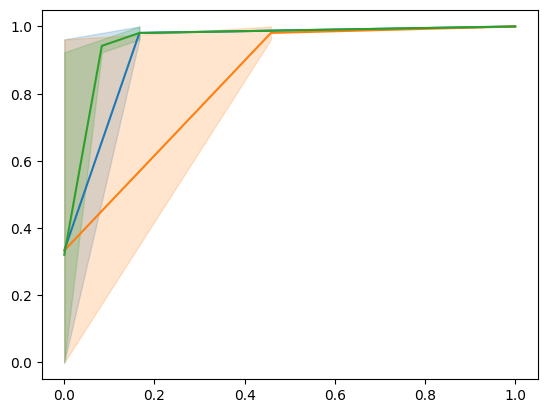

In [319]:
# Your code here
# druglr
# c01lr
# c1lr

fpr1, tpr1, _ = roc_curve(ytest, ytest_prob[:,1], pos_label=druglr.classes_[1]) 
fpr2, tpr2, _ = roc_curve(ytest, ytest_prob01[:,1], pos_label=c01lr.classes_[1]) 
fpr3, tpr3, _ = roc_curve(ytest, ytest_prob1[:,1], pos_label=c1lr.classes_[1]) 

ax =sns.lineplot(x=fpr1,y=tpr1)
ax =sns.lineplot(x=fpr2,y=tpr2)
ax =sns.lineplot(x=fpr3,y=tpr3)

ax1.set_xlabel("FP Rate")
ax2.set_ylabel("TP Rate")

print(auc(fpr1,tpr1).round(3))
print(auc(fpr2,tpr2).round(3))
print(auc(fpr3,tpr3).round(3))


#6 pts

* Which classifier has a highest estimated probability of correctly distinguishing between a positive and a negative instance? How do you know?

the classifier with c=1, since it has the largest under under the curve

**YOUR ANSWER:** [1 pts] 


# Question 8: /11 pts

Multiclass Logistic Regression

In the classification lab, we trained a binary LR classifier using the _mnist_ dataset to discriminate entries which were equal to 5 from the rest. This time you have 10 classes i.e., 0, 1, 2, 3, 4, 5, 6, 7, 8, and 9. Use the same dataset and `SGDClassifier` to tain a multiclass logistic regression model with `l2` regularization. For training, include these arguments too: `max_iter=2000`, `tol=1e-3`, `random_state=seed`. For computation speed-up, some `sklearn` functions take the argument `n_jobs=N` to run in parallel. A good value for N can be the number of physical CPU cores that your machine possesses. Check the documentations of the functions to take advantage from this where applicable. For splitting the data use `test_size=0.5` and `random_state=seed`.

Put your classifier and the `StandardScaler()` into a pipeline using `make_pipeline`. Therefore, your final model will be a pipeline that always standardizes the data before feeding it to the classifier. Use the `classification_report` to report the performance of your final model (*i.e.*, the pipeline) over the **test set**.



In [322]:
# code here
from sklearn.datasets import fetch_openml 
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=seed)
pipeline = make_pipeline(StandardScaler(), SGDClassifier(max_iter=2000, tol=1e-3, random_state=0, penalty='l2', n_jobs=-1))
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

#9 pts

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      3535
           1       0.97      0.96      0.96      3954
           2       0.91      0.89      0.90      3475
           3       0.92      0.86      0.89      3546
           4       0.92      0.91      0.92      3386
           5       0.89      0.83      0.86      3158
           6       0.94      0.94      0.94      3389
           7       0.94      0.91      0.93      3652
           8       0.73      0.92      0.81      3392
           9       0.89      0.86      0.88      3513

    accuracy                           0.90     35000
   macro avg       0.91      0.90      0.90     35000
weighted avg       0.91      0.90      0.91     35000



Let's see how the model generalizes to new data.

You can run the cell below to see how well your model can recognize a digit written by the mouse cursor. Set the `final_model` variable according to the name choses for your pipeline, run the cell, draw on the pop-up canvas, and once you close the canvas you will see the result.

This code will not work on headless servers such as Colab. You need to install the `tk-tools` package and run it locally.

Your input:


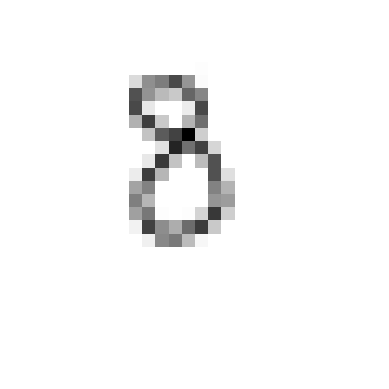

Input recognized as 5.


In [324]:
final_model = pipeline  # here use the name of your pipeline

#!pip install tk-tools
from tkinter import *
import tkinter as tk
from PIL import Image
import io
import matplotlib as mpl

temp_file_name="TEMP_image_TEMP.jpg"

app = Tk()
app.geometry("300x300")

canvas = tk.Canvas(app, bg='white')
canvas.pack(anchor='nw', fill='both', expand=1)

def get_x_and_y(event):
    global lasx, lasy
    lasx, lasy = event.x, event.y

def draw_smth(event):
    global lasx, lasy
    canvas.create_line((lasx, lasy, event.x, event.y), fill='red', width=3.5)
    lasx, lasy = event.x, event.y
    ps = canvas.postscript(colormode = 'color')
    img = Image.open(io.BytesIO(ps.encode('utf-8')))
    img.save(temp_file_name)

canvas.bind("<Button-1>", get_x_and_y)
canvas.bind("<B1-Motion>", draw_smth)

app.mainloop()

img = Image.open(temp_file_name)
#resize image to 28x28 pixels
img = img.resize((28,28))
#convert rgb to grayscale
img = img.convert("L")
img = np.array(img)
img = 255.0 - img
print("Your input:")
plt.imshow(img, cmap = mpl.cm.binary); plt.axis("off")
plt.show()

# reshaping to support our model input
img = np.reshape(img, 28*28)
#predicting the class
print('Input recognized as ' + str(final_model.predict([img])[0])+'.')

* Despite showing great scores in training and testing stages, why your model does not generalize well to new data?

**YOUR ANSWER:** [2 pts]

Perhaps overfitting may be in play, since it did so well in the testing stages, it is likely overly adjusted to the training data, and when new data appears, the model is over predicted and doesnt fit the new data well.